File CSV đã được tạo!
    GT  KT      KV       DH1       DH2       DH3        T1
0  Nam  A1     KV1  2.090716  0.276168  3.483366  2.944939
1   Nữ  A1  KV2-NT  5.414480  5.788649  9.366482  9.958314
2  Nam   C     KV2  6.957844  4.384741  0.391863  6.969251
3  Nam  A1     KV3  2.285500  6.720261  4.179460  3.842018
4  Nam  A1     KV3  1.749549  3.281527  9.675806  7.371007
         DH1
93  0.051849
33  0.180754
57  0.436038
98  0.507685
77  0.704161
     GT       DH2
67  Nam  0.153045
57  Nam  0.171611
0   Nam  0.276168
10  Nam  0.388347
47  Nam  0.477161
    count         sum      mean    median       min       max       std  \
KT                                                                        
A      24  116.837048  4.868210  4.642975  0.507685  9.944575  2.832149   
A1     15   55.341508  3.689434  2.301853  0.436038  8.442131  2.432221   
B      19   96.038908  5.054679  4.852799  0.709409  9.803316  2.746106   
C      22  125.474621  5.703392  6.305072  0.051849  9.945505  

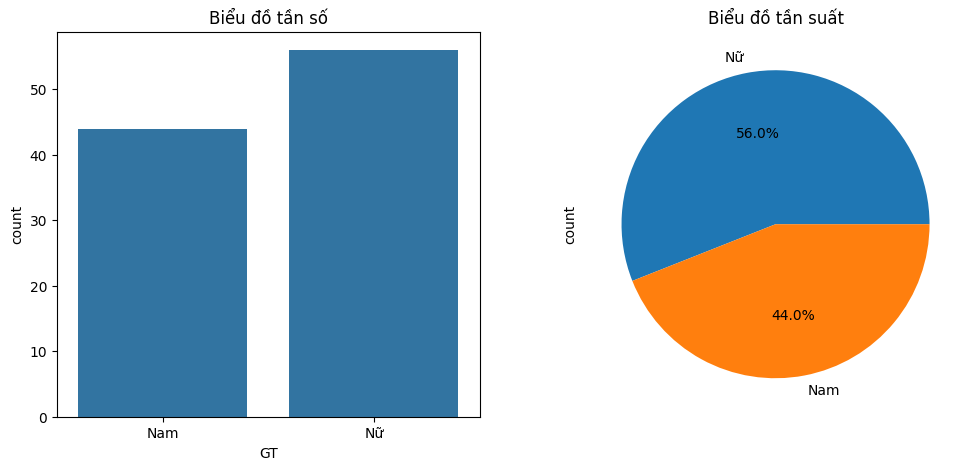

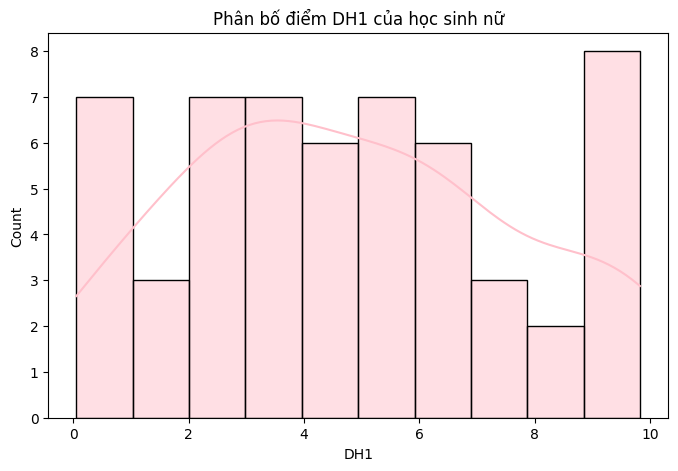

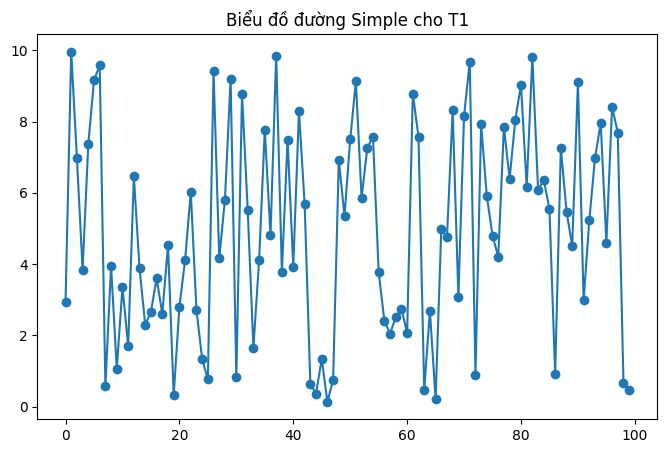

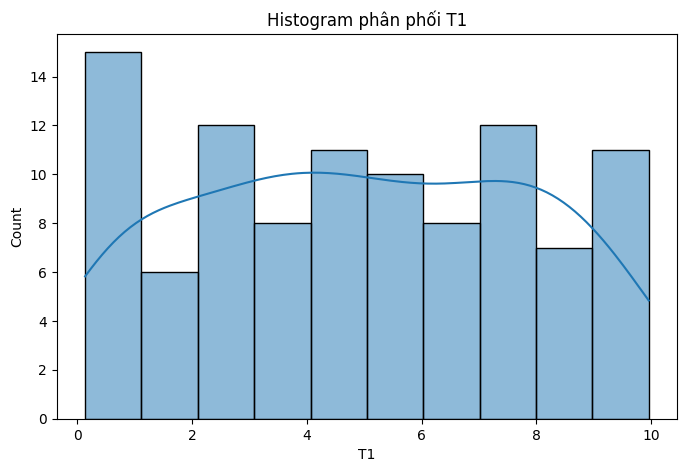

count    100.000000
mean       4.939636
std        2.918772
min        0.136720
25%        2.644409
50%        4.802080
75%        7.516828
max        9.958314
Name: T1, dtype: float64


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo dữ liệu giả lập nếu chưa có file CSV
try:
    df = pd.read_csv("processed_dulieuxettuyendaihoc.csv")
except FileNotFoundError:
    np.random.seed(42)
    data = {
        "GT": np.random.choice(["Nam", "Nữ"], 100),
        "KT": np.random.choice(["A", "A1", "B", "C", "D"], 100),
        "KV": np.random.choice(["KV1", "KV2", "KV2-NT", "KV3"], 100),
        "DH1": np.random.uniform(0, 10, 100),
        "DH2": np.random.uniform(0, 10, 100),
        "DH3": np.random.uniform(0, 10, 100),
        "T1": np.random.uniform(0, 10, 100)
    }
    df = pd.DataFrame(data)
    df.to_csv("processed_dulieuxettuyendaihoc.csv", index=False)
    print("File CSV đã được tạo!")

# Hiển thị 5 dòng đầu tiên
print(df.head())

# Phần 1: Thống kê dữ liệu
# 1. Sắp xếp điểm DH1 tăng dần
df_sorted_dh1 = df.sort_values(by="DH1")
print(df_sorted_dh1[["DH1"]].head())

# 2. Sắp xếp điểm DH2 theo giới tính
df_sorted_dh2 = df.sort_values(by=["GT", "DH2"])
print(df_sorted_dh2[["GT", "DH2"]].head())

# 3. Pivot-table thống kê DH1 theo KT
pivot_kt = df.pivot_table(values="DH1", index="KT", aggfunc=['count', 'sum', 'mean', 'median', 'min', 'max', 'std', 
                                                            lambda x: x.quantile(0.25), 
                                                            lambda x: x.quantile(0.5), 
                                                            lambda x: x.quantile(0.75)])
pivot_kt.columns = ['count', 'sum', 'mean', 'median', 'min', 'max', 'std', 'Q1', 'Q2', 'Q3']
print(pivot_kt)

# 4. Pivot-table thống kê DH1 theo KT, KV
pivot_kt_kv = df.pivot_table(values="DH1", index=["KT", "KV"], aggfunc=['count', 'sum', 'mean', 'median', 'min', 'max', 'std', 
                                                                        lambda x: x.quantile(0.25), 
                                                                        lambda x: x.quantile(0.5), 
                                                                        lambda x: x.quantile(0.75)])
pivot_kt_kv.columns = ['count', 'sum', 'mean', 'median', 'min', 'max', 'std', 'Q1', 'Q2', 'Q3']
print(pivot_kt_kv)

# Phần 2: Trình bày dữ liệu
# 1. Bảng tần số và tần suất cho GT
gt_freq = df['GT'].value_counts()
gt_relative_freq = df['GT'].value_counts(normalize=True)
print(pd.DataFrame({'Tần số': gt_freq, 'Tần suất': gt_relative_freq}))

# Vẽ biểu đồ tần số và tần suất
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x=df['GT'], ax=axes[0])
axes[0].set_title("Biểu đồ tần số")
df['GT'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1])
axes[1].set_title("Biểu đồ tần suất")
plt.show()

# Phần 3: Trực quan hóa dữ liệu theo nhóm phân loại
# Trực quan dữ liệu học sinh nữ theo XL1, XL2, XL3
df_female = df[df['GT'] == "Nữ"]
plt.figure(figsize=(8, 5))
sns.histplot(df_female['DH1'], bins=10, kde=True, color='pink')
plt.title("Phân bố điểm DH1 của học sinh nữ")
plt.show()

# Phần 4: Trực quan hóa dữ liệu nâng cao
# Vẽ biểu đồ đường Simple cho T1
plt.figure(figsize=(8, 5))
plt.plot(df.index, df['T1'], marker='o', linestyle='-')
plt.title("Biểu đồ đường Simple cho T1")
plt.show()

# Phân loại T1 thành các nhóm
def classify_t1(score):
    if score < 5:
        return "Kém"
    elif score < 7:
        return "Trung bình"
    elif score < 8:
        return "Khá"
    else:
        return "Giỏi"

df['phanlopT1'] = df['T1'].apply(classify_t1)

# Biểu đồ Histogram cho T1
plt.figure(figsize=(8, 5))
sns.histplot(df['T1'], bins=10, kde=True)
plt.title("Histogram phân phối T1")
plt.show()

# Mô tả dữ liệu T1
print(df['T1'].describe())
